In [36]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

#https://philuttley.github.io/prog4aa_lesson2/10-fitsfiles/index.html


## Information

- paper: https://arxiv.org/abs/2201.10541
- data: https://www.sarao.ac.za/media-releases/new-meerkat-radio-image-reveals-complex-heart-of-the-milky-way/
- article: https://www.space.com/meerkat-milky-way-mosaic-filaments

## Astropy FITS handling

In [2]:
gals = fits.open('MeerKAT_Galactic_Centre_1284MHz-StokesI.fits')
gals.info()

Filename: MeerKAT_Galactic_Centre_1284MHz-StokesI.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (10121, 10527)   float64   


In [3]:
gals[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -64                                                  
NAXIS   =                    2                                                  
NAXIS1  =                10121                                                  
NAXIS2  =                10527                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-                           
COMMENT   MeerKAT Galactic Centre Survey                                        
COMMENT   South African Radio Astronomy Observatory                             
COMMENT   Total intensity mosaic                                                
COMMENT   Contact: ian.heywo

In [83]:
wcs1

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---TAN'  'DEC--TAN'  'FREQ'  'STOKES'  
CRVAL : 266.366790598  -29.2213778092  1283895507.8125  1.0  
CRPIX : 5072.5  5265.5  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.000305556  0.000305556  856000000.0  1.0  
NAXIS : 10121  10527

This image has a bunch of data at the high end at at the low end.... perhaps logarithmic on megjoules?

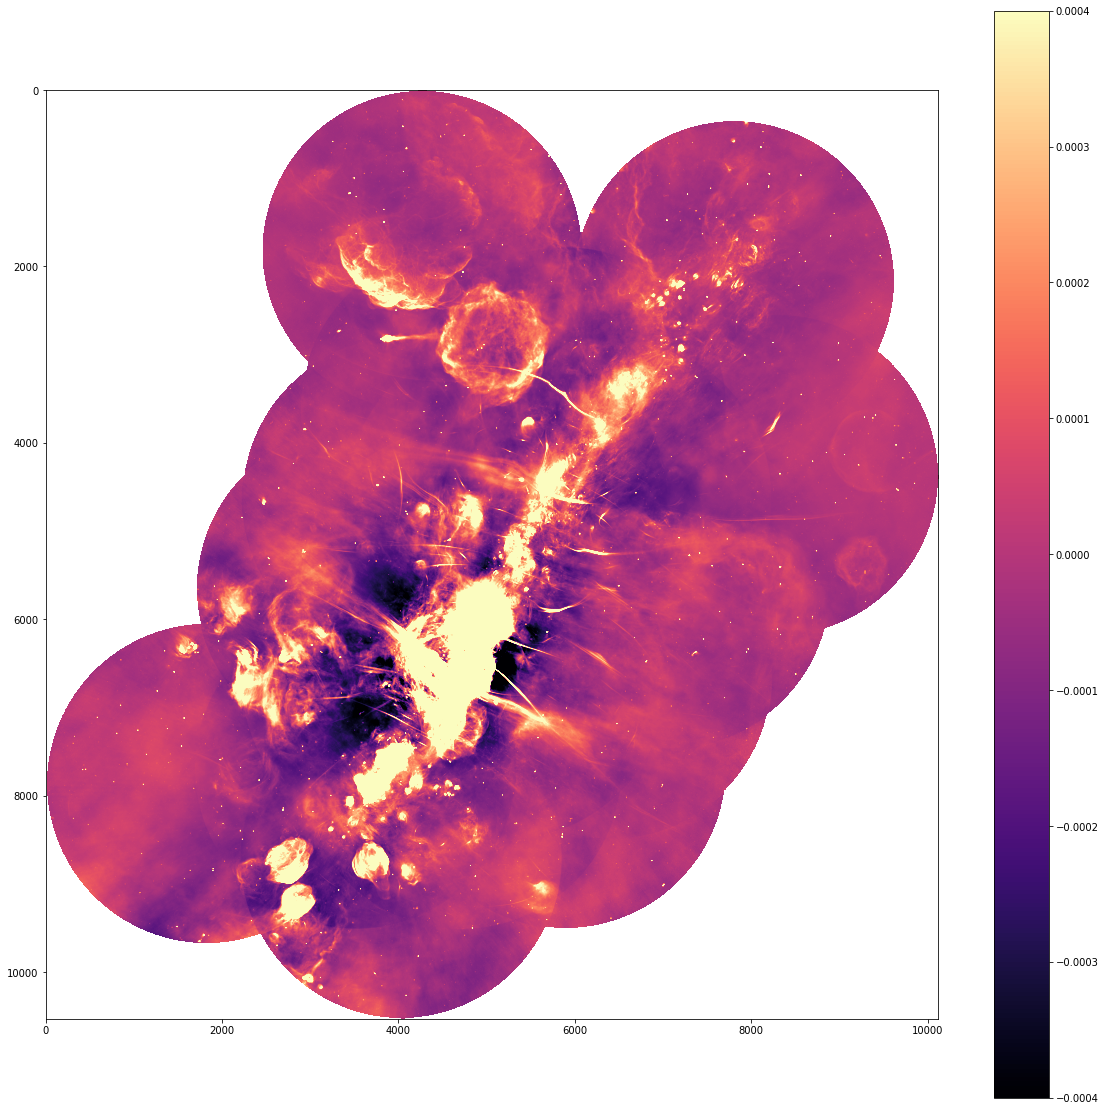

In [112]:
image_data = gals[0].data
wcs1 = WCS(gals[0].header)
#plt.figure()
plt.figure(figsize=(20,20))

#plt.subplot(projection=wcs1.celestial)
#plt.figure(figsize=(20,20))
#plt.imshow(image_data, cmap='magma',vmin=0.02,vmax=0.10)
#plt.imshow(image_data[5800:6200,4500:5500], cmap='magma',vmin=-0.0001,vmax=0.0001)
plt.imshow(image_data, cmap='magma',vmin=-0.0004,vmax=0.0004)
#plt.imshow(image_data, cmap='magma')
plt.colorbar()

plt.show()

In [98]:
wcs1.celestial

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 266.366790598  -29.2213778092  
CRPIX : 5072.5  5265.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.000305556  0.000305556  
NAXIS : 10121  10527

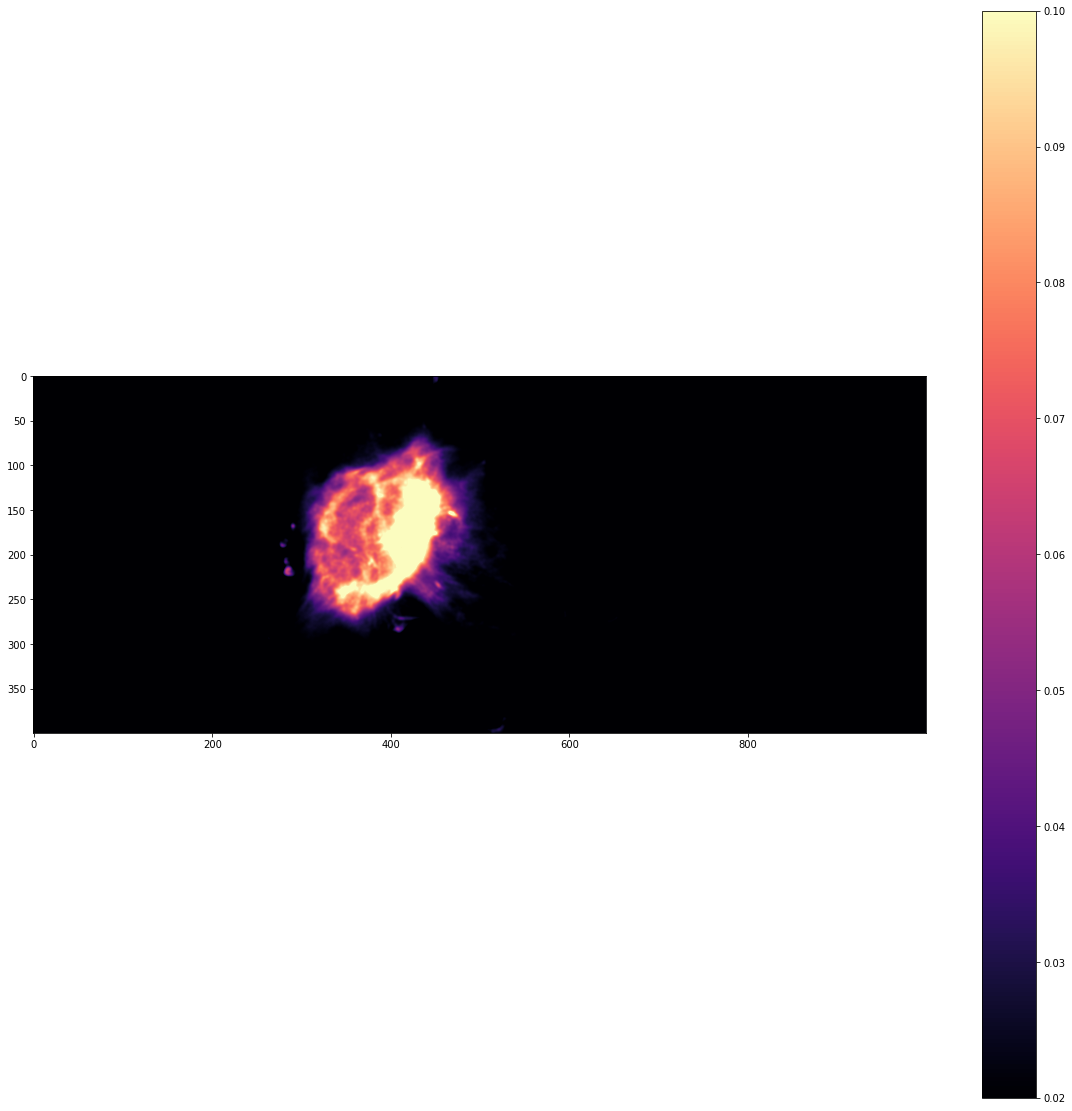

In [66]:
image_data = gals[0].data
plt.figure(figsize=(20,20))
#plt.imshow(image_data, cmap='magma',vmin=0.02,vmax=0.10)
plt.imshow(image_data[5800:6200,4500:5500], cmap='magma',vmin=0.02,vmax=0.10)
plt.colorbar()
plt.show()

In [10]:
gals[0].data.shape

(10527, 10121)

In [29]:
np.nanmax(gals[0].data)
np.nanmin(gals[0].data)

-0.001257793781580814

In [31]:
gals2 = fits.open('MeerKAT_Galactic_Centre_alpha.fits')
gals2.info()

Filename: MeerKAT_Galactic_Centre_alpha.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (11946, 12521)   float64   


In [56]:
print(np.nanmin(image_data2))
print(np.nanmax(image_data2))

-8.178359447345276
8.650717635746776


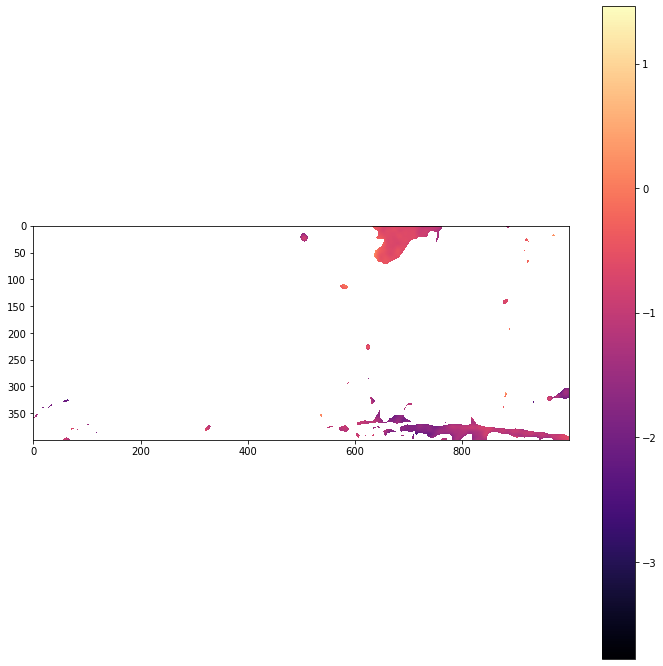

In [69]:
import astropy.visualization as av

image_data2 = gals2[0].data
plt.figure(figsize=(12,12))
#av.imshow_norm(image_data2[4000:6000,6000:8000], cmap='Reds')
plt.imshow(image_data2[5800:6200,4500:5500], cmap='magma')
#av.imshow_norm(image_data2, cmap='Reds')
plt.colorbar()
plt.show()

In [59]:
image_data2[4000:6000,6000:8000].shape

(2000, 2000)

Need to still work out how WCSAxes uses axes and do an axes plot for a bigger figure with galactic coordinates

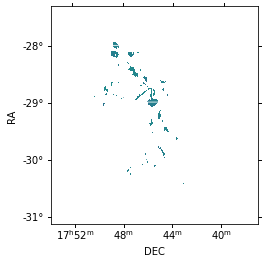

In [54]:
wcs = WCS(gals2[0].header)

plt.subplot(projection=wcs)
plt.imshow(image_data2)
plt.grid(color='white', ls='solid')
plt.xlabel('DEC')
plt.ylabel('RA')


In [46]:
gals2[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -64                                                  
NAXIS   =                    2                                                  
NAXIS1  =                11946                                                  
NAXIS2  =                12521                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-                           
COMMENT   MeerKAT Galactic Centre Survey                                        
COMMENT   South African Radio Astronomy Observatory                             
COMMENT   Spectral index mosaic                                                 
COMMENT   Contact: ian.heywo

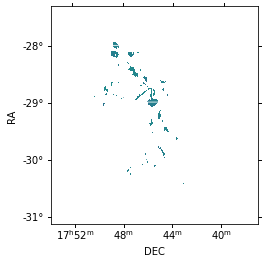

In [53]:
plt.subplot(projection=wcs)
plt.imshow(image_data2)
plt.grid(color='white', ls='solid')
plt.xlabel('DEC')
plt.ylabel('RA')


In [38]:
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

In [41]:
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

In [42]:
hdu.header

SIMPLE  =                    T                                                  
BITPIX  =                  -64                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  149                                                  
NAXIS2  =                  149                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRPIX1  =               75.907                                                  
CRVAL1  =                   0.                                                  
CDELT1  =      -0.006666666828                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRPIX2  =              74.84

In [91]:
wcs2 = WCS(gals2[0].header)

In [92]:
wcs2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 266.366171411  -29.221238833  
CRPIX : 5985.5  6286.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.000305556  0.000305556  
NAXIS : 11946  12521

## Spectral Image

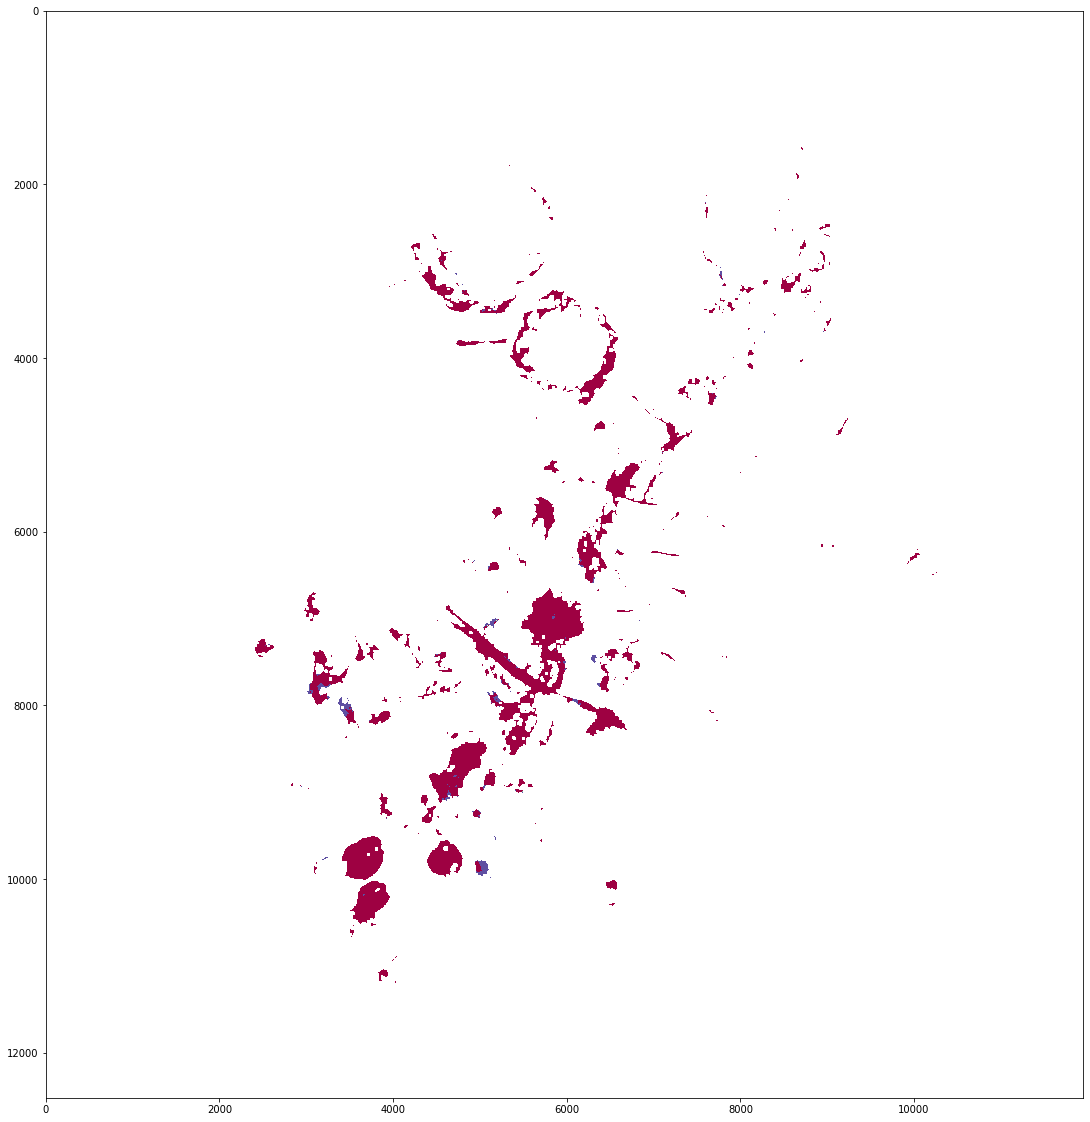

In [117]:
plt.figure(figsize=(20,20))
plt.imshow(image_data2, cmap='Spectral',vmin=-0.0004,vmax=0.0004)
plt.show()